In [188]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.signal import correlate
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
data = "test.xlsx"
data2 = "test2.csv"
df = pd.read_csv(data2)
df = df.dropna(axis=1)
df.head()

,"I have a certain amount of intelligence, and I can't really do much to change it.",My intelligence is something that I cannot change very much.,"I believe that no matter who you are, you can significantly change your intelligence level.",I believe that you can't really change how intelligent you are.,I believe that you can always substantially change how intelligent you are.,"You can learn new things, but you can't really change your basic intelligence.","No matter how much intelligence you have, whether high or low, you can always change it to quite a degree.",I can change even my basic intelligence level considerably.,"People have a certain amount of talent, and you can't really do much to change it.",Your talent is something you can't change very much.,...,I understand how others feel.,I listen for more than just the spoken words.,I assure others that I will remember what they say.,I summarise points of agreement and disagreement when appropriate.,I keep track of points others make.,I assure others that I am listening by using verbal acknowledgements.,I assure others that I am receptive to their ideas.,I ask questions that show my understanding of others' positions.,"I show others that I am listening through my body language (e.g. head nods, eye contact)",Score
0,1,1,7,1,7,1,7,7,4,2,...,7,7,7,7,7,7,7,7,7,10
1,3,3,5,5,5,3,4,5,2,1,...,7,7,7,7,7,6,7,7,7,9
2,3,2,6,3,5,3,5,4,3,3,...,5,6,5,5,6,5,5,4,4,7
3,6,5,3,4,4,5,4,4,6,6,...,6,6,6,5,6,5,4,4,6,8
4,4,3,5,3,5,3,5,5,4,4,...,6,6,3,5,5,5,5,5,5,8


In [124]:
array = {}

In [193]:
for i in range(80):
    for j in range(80):
        if i>=j:
            continue
        else:
            array[(i, j)] = pearsonr(df.iloc[:,[i]], df.iloc[:, [j]])[0][0]

In [194]:
sorted_array = sorted(array.items(), key=operator.itemgetter(1))
ranked_array = sorted_array[::-1]
ranked_array

[((0, 1), 0.7527829699288269),
 ((47, 48), 0.7470635171578974),
 ((48, 49), 0.7467278348380113),
 ((52, 53), 0.7317983622791487),
 ((46, 47), 0.7267814741387759),
 ((14, 15), 0.7267736037695585),
 ((8, 9), 0.725291156110321),
 ((47, 49), 0.6963830503194024),
 ((70, 71), 0.6869754910901622),
 ((64, 65), 0.6863600766722017),
 ((53, 55), 0.6809557037322961),
 ((42, 43), 0.6802026700146443),
 ((39, 40), 0.6786683891183128),
 ((9, 13), 0.6785803936986099),
 ((65, 67), 0.6768099957321413),
 ((46, 48), 0.6758765676856076),
 ((58, 62), 0.6640829519087622),
 ((9, 11), 0.6591785586474477),
 ((1, 3), 0.657028836484623),
 ((63, 66), 0.6521724903491694),
 ((6, 7), 0.6515801393187765),
 ((63, 65), 0.6511867751844056),
 ((49, 50), 0.650158877439146),
 ((39, 42), 0.6497946946739802),
 ((43, 44), 0.6473212304285125),
 ((65, 66), 0.6468396934333873),
 ((48, 50), 0.6426026040633689),
 ((73, 74), 0.6423208554993834),
 ((2, 6), 0.6410832125893606),
 ((42, 45), 0.6364754613604354),
 ((46, 49), 0.63449829330

In [202]:
print(df.iloc[:, [0]].columns.values[0], df.iloc[:, [1]].columns.values[0])
print(df.iloc[:, [47]].columns.values[0], df.iloc[:, [48]].columns.values[0])
print(df.iloc[:, [52]].columns.values[0], df.iloc[:, [53]].columns.values[0])

I have a certain amount of intelligence, and I can't really do much to change it. My intelligence is something that I cannot change very much.
It's fascinating to learn new information. I enjoy exploring new ideas.
I'm always seeking new opportunities for my group. I inspire my group with my plan for the future.


In [157]:
x = [v for k, v in ranked_array]
y = [k for k, v in ranked_array]

In [159]:
num = 0
for k, v in ranked_array:
    if v > 0.6:
        num += 1
num

53

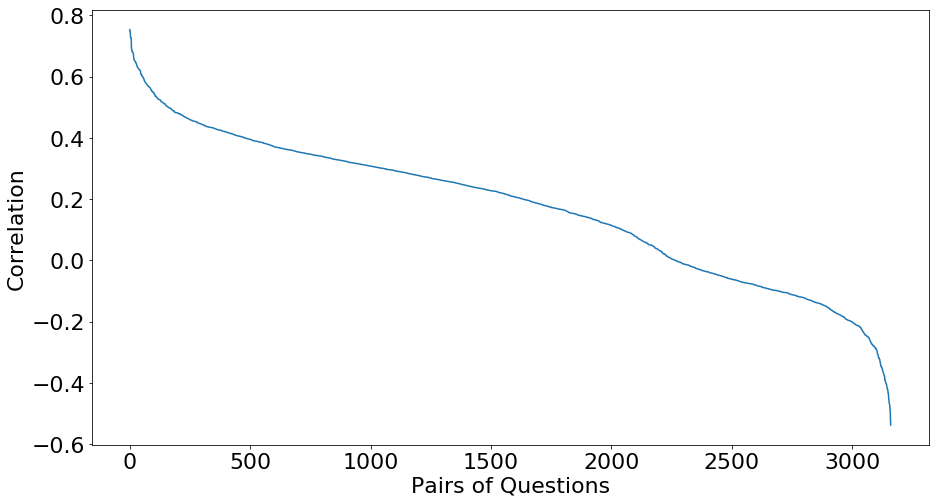

In [186]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(x)
ax.set_xlabel('Pairs of Questions')
ax.set_ylabel('Correlation')
plt.rcParams.update({'font.size': 17})

In [223]:
d = {}

for i in range(10, 31, 1):
    repeat_answer_threshold = i

    dropouts = 0
    for row in test:
        repeats = 0
        prev_num = 0
        for val in row:
            if val==prev_num:
                repeats += 1
            else:
                repeats = 0
                prev_num = val
            if repeats == repeat_answer_threshold:
                dropouts += 1
                break
    d[i] = dropouts

In [219]:
d

{10: 152,
 11: 123,
 12: 107,
 13: 92,
 14: 88,
 15: 81,
 16: 75,
 17: 71,
 18: 66,
 19: 62,
 20: 57,
 21: 54,
 22: 51,
 23: 46,
 24: 41,
 25: 40,
 26: 35,
 27: 34,
 28: 33,
 29: 31,
 30: 29}

In [220]:
threshold = [k for k, v in d.items()]
num_offenders = [v for k, v in d.items()]

Text(0,0.5,'Number of offenders')

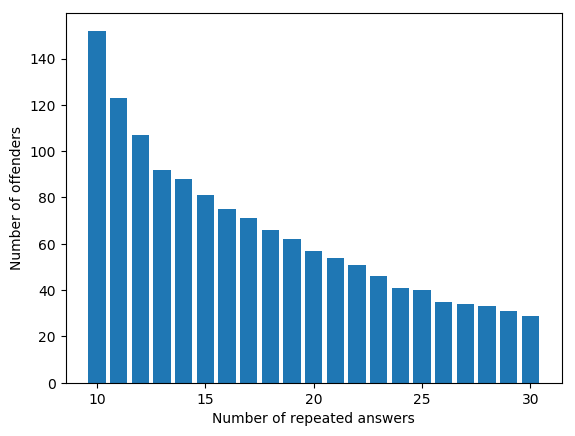

In [224]:
plt.style.use('default')
f2, a2 = plt.subplots()
a2.bar(threshold, num_offenders)
a2.set_xlabel('Number of repeated answers')
a2.set_ylabel('Number of offenders')
